# Cats and Dogs Classification CNN

My first CNN using color images. The idea is to build a model that can recognize the difference between cat and dog images.


In [1]:
# Import Libraries
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

# The Data

In [2]:
# Check list directory
mainDIR = os.listdir('../Cats_Dogs_Classification_CNN/Data/')
print(mainDIR)

['.DS_Store', 'training_set', 'validation_set', 'test_set']


In [3]:
# Folder paths
train_folder = '../Cats_Dogs_Classification_CNN/Data/training_set/'
test_folder = '../Cats_Dogs_Classification_CNN/Data/test_set/'
val_folder = '../Cats_Dogs_Classification_CNN/Data/validation_set/'

In [ ]:
# Train folders
os.listdir(train_folder)
train_dogs = train_folder+'dogs/'
train_cats = train_folder+'cats/'

In [ ]:
print(len(os.listdir(train_dogs)))
print(len(os.listdir(train_cats)))

In [7]:
# Test folders 
os.listdir(test_folder)
test_dogs = test_folder+'dogs/'
test_cats = test_folder+'cats/'

In [8]:
print(len(os.listdir(test_dogs)))
print(len(os.listdir(test_cats)))

501
501


In [9]:
# Valadation folders  (I manually separated half of the test data for the val set)
os.listdir(val_folder)
val_dogs = val_folder+'dogs/'
val_cats = val_folder+'cats/'

In [10]:
print(len(os.listdir(val_dogs)))
print(len(os.listdir(val_cats)))

501
501


# Random dog and cat pictures

4000
dog picture title:  dog.1574.jpg
4000
cat picture title:  cat.2166.jpg


Text(0.5, 1.0, 'Cat')

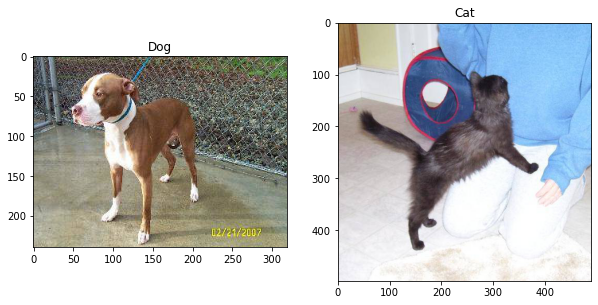

In [6]:
# Dog pic 
rand_dog = np.random.randint(0,len(os.listdir(train_dogs)))
dog_pic = os.listdir(train_dogs)[rand_dog]
dog_pic_address = train_dogs + dog_pic
print('dog picture title: ', dog_pic)

# Cat pic
rand_cat = np.random.randint(0,len(os.listdir(train_cats)))
cat_pic =  os.listdir(train_cats)[rand_cat]
cat_pic_address = train_cats + cat_pic
print('cat picture title: ', cat_pic)


# Load the images
dog_load = Image.open(dog_pic_address)
cat_load = Image.open(cat_pic_address)


# View images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(dog_load)
a1.set_title('Dog')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(cat_load)
a2.set_title('Cat')

# Build the model

In [11]:
# The CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(64, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
num_of_test_samples = 1000
batch_size = 50

In [20]:
# Model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# Image processing

In [21]:
# The function ImageDataGenerator process the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#Image normalization.
test_datagen = ImageDataGenerator(rescale = 1./255)  
val_datagen = ImageDataGenerator(rescale = 1./255)  



training_set = train_datagen.flow_from_directory('../Cats_Dogs_Classification_CNN/Data/training_set/',
                                                 target_size = (128, 128),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

validation_set = val_datagen.flow_from_directory('../Cats_Dogs_Classification_CNN/Data/validation_set/',
                                                        target_size=(128, 128),
                                                        batch_size=50,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory('../Cats_Dogs_Classification_CNN/Data/test_set/',
                                            target_size = (128, 128),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fit the model

In [22]:
# Fit the model
cnn_model = cnn.fit(training_set, batch_size = 200, epochs = 10, validation_data = validation_set)

Epoch 1/10
160/160 [==============================] - 168s 1s/step - loss: 0.6994 - accuracy: 0.6165 - val_loss: 0.6109 - val_accuracy: 0.6680
Epoch 2/10
160/160 [==============================] - 150s 937ms/step - loss: 0.5925 - accuracy: 0.6790 - val_loss: 0.6073 - val_accuracy: 0.6860
Epoch 3/10
160/160 [==============================] - 152s 952ms/step - loss: 0.5498 - accuracy: 0.7189 - val_loss: 0.5275 - val_accuracy: 0.7320
Epoch 4/10
160/160 [==============================] - 163s 1s/step - loss: 0.5138 - accuracy: 0.7467 - val_loss: 0.5262 - val_accuracy: 0.7400
Epoch 5/10
160/160 [==============================] - 170s 1s/step - loss: 0.4804 - accuracy: 0.7739 - val_loss: 0.5251 - val_accuracy: 0.7510
Epoch 6/10
160/160 [==============================] - 163s 1s/step - loss: 0.4578 - accuracy: 0.7779 - val_loss: 0.4904 - val_accuracy: 0.7690
Epoch 7/10
160/160 [==============================] - 169s 1s/step - loss: 0.4277 - accuracy: 0.8026 - val_loss: 0.5647 - val_accuracy: 

# Testing accuracy

In [23]:
# Test accuracy - Fourth Try!
test_accu = cnn.evaluate(test_set)

20/20 [==============================] - 8s 389ms/step - loss: 0.4575 - accuracy: 0.8190


In [24]:
# THIRD TRY - 
# cnn_model = cnn.fit(training_set, batch_size = 200, epochs = 5, validation_data = validation_set)
# 20/20 [==============================] - 7s 348ms/step - loss: 0.4852 - accuracy: 0.7710

In [25]:
# SECOND TRY -
# cnn_model = cnn.fit(training_set, batch_size = 100, epochs = 10, validation_data = validation_set)
# 32/32 [==============================] - 7s 222ms/step - loss: 0.4838 - accuracy: 0.7650

In [26]:
# FIRST TRY - 
# cnn_model = cnn.fit(training_set, batch_size = 1000, epochs = 8) no validation set!
# 63/63 [==============================] - 13s 202ms/step - loss: 0.4626 - accuracy: 0.7850

# Accuracy and Loss

In [27]:
# Functions for accuracy and loss
def visualize_loss(model_results):
    history = model_results.history
    training_loss_values = history['loss']
    val_loss_values = history['val_loss']

    epochs = range(1, len(training_loss_values) + 1)
    plt.plot(epochs, training_loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'r', label='Val Loss')

    plt.title('Training vs Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def visualize_accuracy(model_results):
    history = model_results.history
    training_acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']

    epochs = range(1, len(training_acc_values) + 1)
    plt.plot(epochs, training_acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Val Accuracy')

    plt.title('Training vs Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

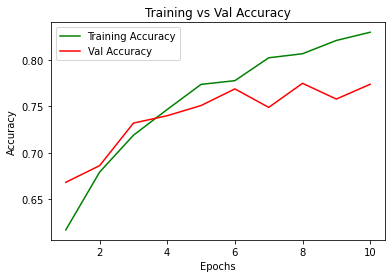

In [28]:
# Visualize accuracy
visualize_accuracy(cnn_model)

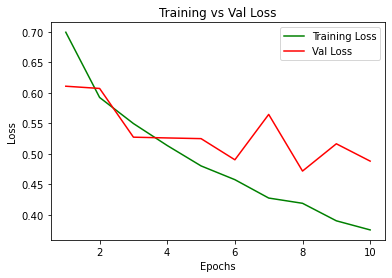

In [29]:
# Visualize loss
visualize_loss(cnn_model)

# Check predictions

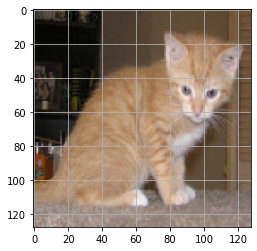

In [34]:
# Look at a prediction
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
test_image = image.load_img("../Cats_Dogs_Classification_CNN/Data/test_set/cats/cat.4003.jpg", 
                            target_size = (128, 128)) 
plt.imshow(test_image)
plt.grid(None) 
plt.show()

In [35]:
# What is it going to be?
res_list= ["It's a cat!","It's a dog!"]

In [36]:
# Test image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [37]:
# Make a prediction
print(res_list[int(cnn.predict(test_image))])

It's a cat !


In [38]:
# What is the image
cnn.predict(test_image)

array([[0.99254644]], dtype=float32)

# Conclusions

I tweeked the model a few different times and finally acAccuracy: 0.8190 - I even was able to get it to recognize the image from my prediction sample. 

I used a couple different notebooks as a guide - to help me with the code. I also tried to focus on using a model that was build for a different CNN classifier to help get all the numbers correct (instead of just copying and pasting code from a project that was already completed). 

# Future Work

Keep playing with the numbers.  As mentioned above, I had to physically manipulate the data - I split up the testing group into a Test and a Validation group. I know there is a way to do this using Python code but I couldn't figure it out or get it to work. Therefore, one thing I would like to learn in the future is how to do this. 

I believe there are also a number of different parameters as well as many more post model result processes that I could adjust and review (such as look at a confusion matrix, or model optimizers).